In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/John/Documents/ml_projects/tripadvisor/data/tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [4]:
data.shape

(20491, 2)

Check out the distribution of ratings in the dataset

Text(0.5, 1.0, 'Distribution of Ratings')

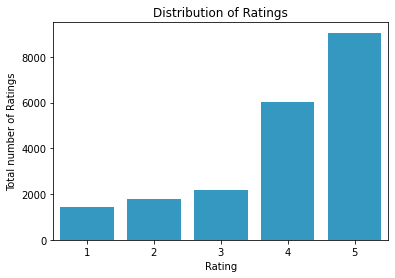

In [15]:
sns.countplot(x=data['Rating'], palette=['#1da2d8'])
plt.ylabel('Total number of Ratings')
plt.title('Distribution of Ratings')

Overwhelmingly positive ratings compared to negative ratings. 

Lets dive deep into checking out the common words within each Rating to see how our model would predict if a rating was positive, negative or neutral.

Begin by stemming each word

In [6]:
from nltk.stem import SnowballStemmer
from nltk import word_tokenize

In [7]:
stem_sentences = []
stemmer = SnowballStemmer(language='english')
for review in data['Review']:
    review_lem = word_tokenize(review)
    review_lem = ' '.join([stemmer.stem(w) for w in review_lem])
    stem_sentences.append(review_lem)

In [8]:
data['stemmed_review'] = stem_sentences
data

,Review,Rating,stemmed_review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not 4 * experi hotel monaco seattl g...
3,"unique, great stay, wonderful time hotel monac...",5,"uniqu , great stay , wonder time hotel monaco ..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay , went seahawk game awes..."
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"best kept secret 3rd time stay charm , not 5-s..."
20487,great location price view hotel great quick pl...,4,great locat price view hotel great quick place...
20488,"ok just looks nice modern outside, desk staff ...",2,"ok just look nice modern outsid , desk staff n..."
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacat hotel open sept 17 2007...


Check out the most common words in a wordcloud and compare with the stemmed reviews

In [9]:
from wordcloud import WordCloud

all_words = []
for row in data['Review']:
    for word in row.split():
        all_words.append(word)

all_stemmed_words = []
for row in data['stemmed_review']:
    for word in row.split():
        all_stemmed_words.append(word)


In [10]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(all_words))
wordcloud_stem = WordCloud(width=800, height=800, background_color='white').generate(' '.join(all_stemmed_words))

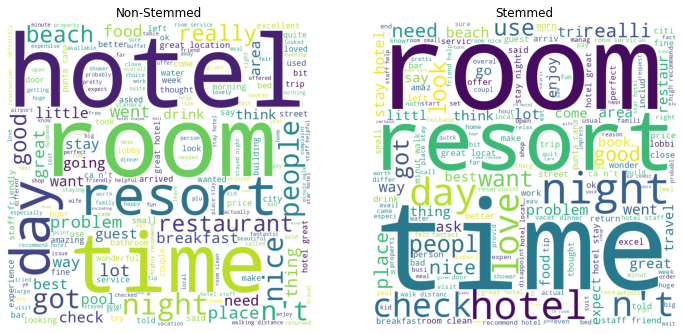

In [11]:
fig = plt.figure(figsize=(12,12))

fig1 = fig.add_subplot(1,2,1)
plt.axis('off')
fig1 = plt.imshow(wordcloud)
plt.title('Non-Stemmed')

fig2 = fig.add_subplot(1,2,2)
plt.axis('off')
fig2 = plt.imshow(wordcloud_stem)
plt.title('Stemmed')

plt.show()

From a general look, it seems that the biggest words that are commonly used between the two are:

Room, time, hotel, resort, nice, day and night

Check the most popular words in a graph

In [38]:
# Create a dictionary of words and their associated number count seen in the corpus
def create_word_dic(words):
    word_dic = {}
    for word in words:
        if word not in word_dic:
            word_dic[word] = 1
        else:
            word_dic[word] += 1
    return word_dic

word_dic = create_word_dic(all_words)

In [40]:
# Create an inverse dictionary to sort the dictionary and retrieve the corresponding words
def num_to_word_dic(dict):
    num_to_word_dict = {}
    for word in dict:
        num_to_word_dict[dict[word]] = word
    return num_to_word_dict

num_to_word_dict = num_to_word_dic(word_dic)

In [42]:
# Lets take the top 10 words seen in the corpus
top_ten_words_num = sorted(num_to_word_dict, reverse=True)[:10]
top_ten_words_num
top_ten_words = [num_to_word_dict[num] for num in top_ten_words_num]
top_ten_words

['hotel',
 'not',
 'room',
 'great',
 "n't",
 'staff',
 'good',
 'did',
 'just',
 'stay']

<AxesSubplot: >

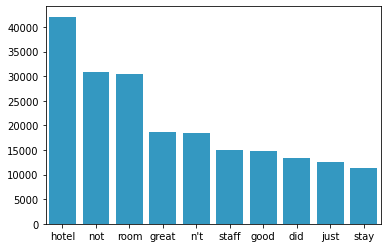

In [43]:
sns.barplot(x=top_ten_words, y=top_ten_words_num, palette = ['#1da2d8'])